# RHF Results
The goal of this notebook is to prove that our RHF code works. We will do this by generating a selection of molecules and then display the value given by psi4 as a reference.

In [9]:
# importing the needed classes
import psi4
import sys
from compChem.Hartree_Fock_modes.rhf import RHFMolecule
from compChem.Hartree_Fock_modes.uhf import UHFMolecule


In [13]:
# molecule n° 1: physicists water
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"rhf", "d_convergence":"1e-12"})
h2o = RHFMolecule("""
0 1
O
H 1 1.1
H 1 1.1 2 104
symmetry c1
""")
h2o.setConvergence(1e-12)
end_data = h2o.iterator(mute=True, criterion="density")
f"scf energy {end_data[0]: .14f}, {end_data[1]} iterations"

'scf energy -74.94207989868110, 37 iterations'

In [14]:
psi4.energy("scf") # psi4 energy takes its molecule as the last molecule that was created, namely the water in the RHFMolecule object

-74.94207989866888

In [2]:
# molecule n° 2: methane
psi4.set_options({"basis":"cc-pvdz", "scf_type":"pk", "reference":"rhf", "d_convergence":"1e-12"})
ch4 = RHFMolecule("""pubchem:methane""")
ch4.setConvergence(1e-12)
end_data = ch4.iterator(mute=True, criterion="density")
f"scf energy {end_data[0]: .14f}, {end_data[1]} iterations"

	Searching PubChem database for methane (single best match returned)
	Found 1 result(s)
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":


'scf energy -40.19870651637012, 34 iterations'

In [3]:
psi4.energy("scf")

-40.19870651630989

We will now proceed to do a stretch the hydrogen gas molecule. We will see that RHF is not the optimal way to do a stretch like this.


In [10]:
# molecule n° 3: hydrogen gas
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"rhf", "d_convergence":"1e-12"}) # cc-pvdz is chosen because uhf and cuhf will use this basis as well
hydrogen = UHFMolecule("""H""")
hydrogen.setConvergence(1e-12)
data = hydrogen.iterator(mute=True)
h_energy = data[0]
h_energy

/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/uhf.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":


-0.46658184955727544

In [11]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies = []
for distance in distances:
    h2 = RHFMolecule(f"""
    H 0 0 0
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy")
    energies.append(E[0] - 2*h_energy)


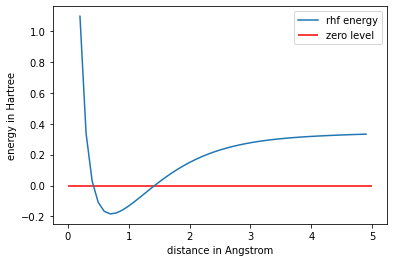

In [14]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies, label="rhf energy")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.hlines(0, 0, 5, color="red", label="zero level")
plt.legend(loc="upper right")